In [1]:
# Function to load the data from the file
def load_data(file_path, start, end):
    predictions = []
    ground_truths = []
    
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i>end:
                break
            if i<start:
                continue
            if line.startswith("Out"):
                parts = line.strip().split(': ')[1].split(' ,')
                prediction = float(parts[0])
                ground_truth = float(parts[1])
                predictions.append(prediction)
                ground_truths.append(ground_truth)
                
    return predictions, ground_truths


In [2]:
# File path
file_path = 'pred'
predictionsRanged = []
ground_truthRanged = []
# Load the data
interval = 5000
for i in range(0, 80000, interval):
    predictions, ground_truths = load_data(file_path,i,i+interval)
    predictionsRanged.append(predictions)
    ground_truthRanged.append(ground_truths)


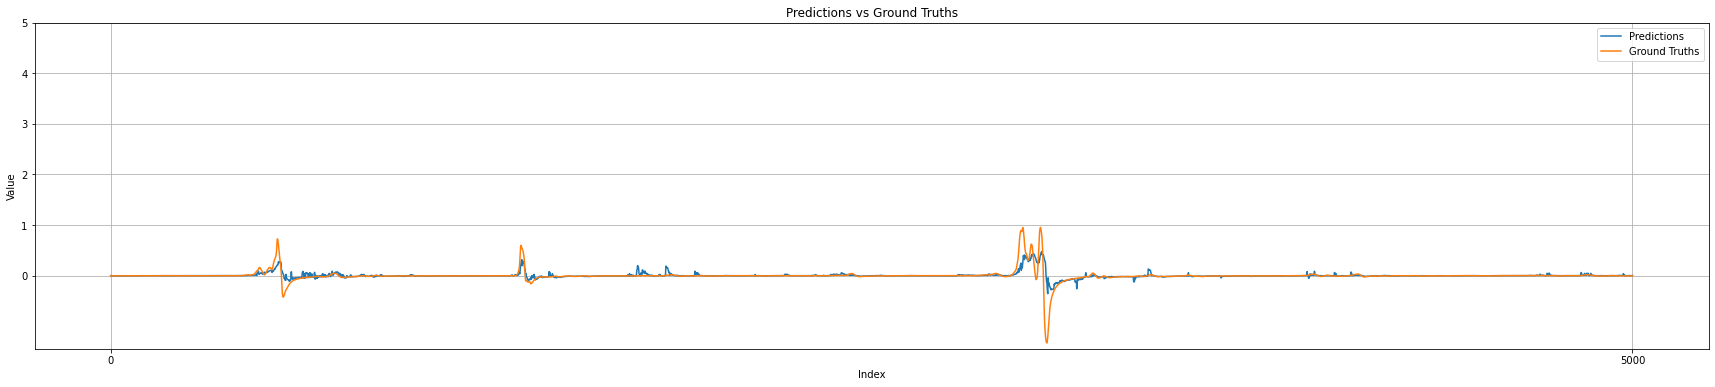

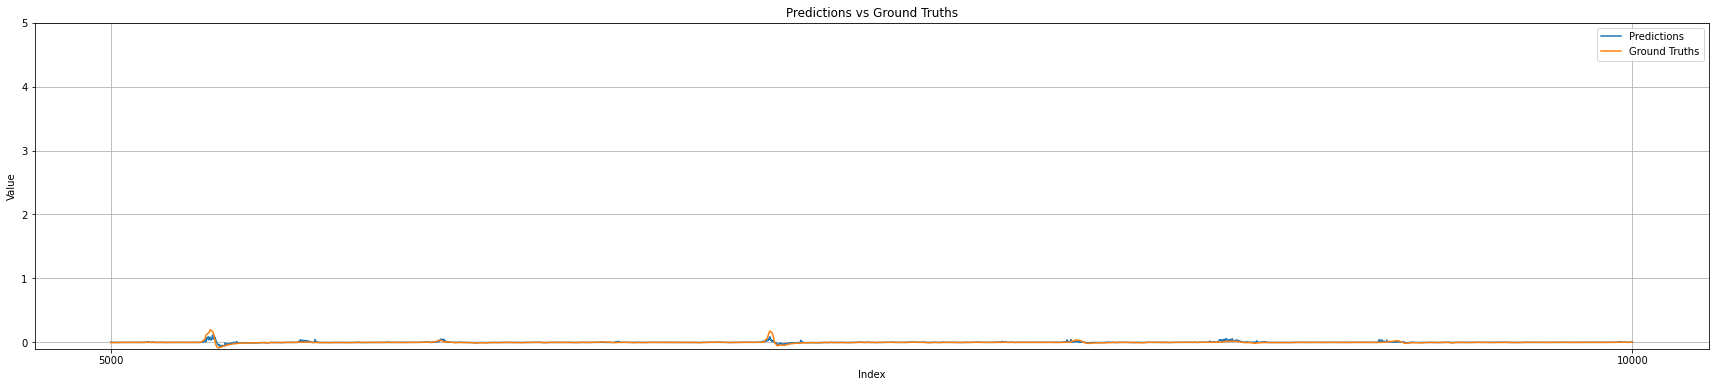

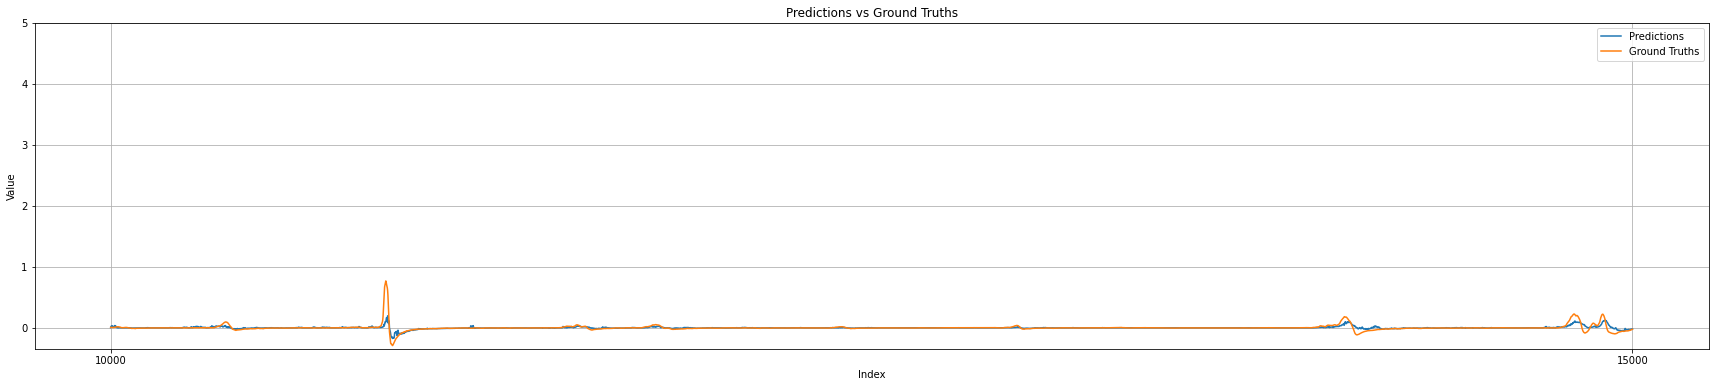

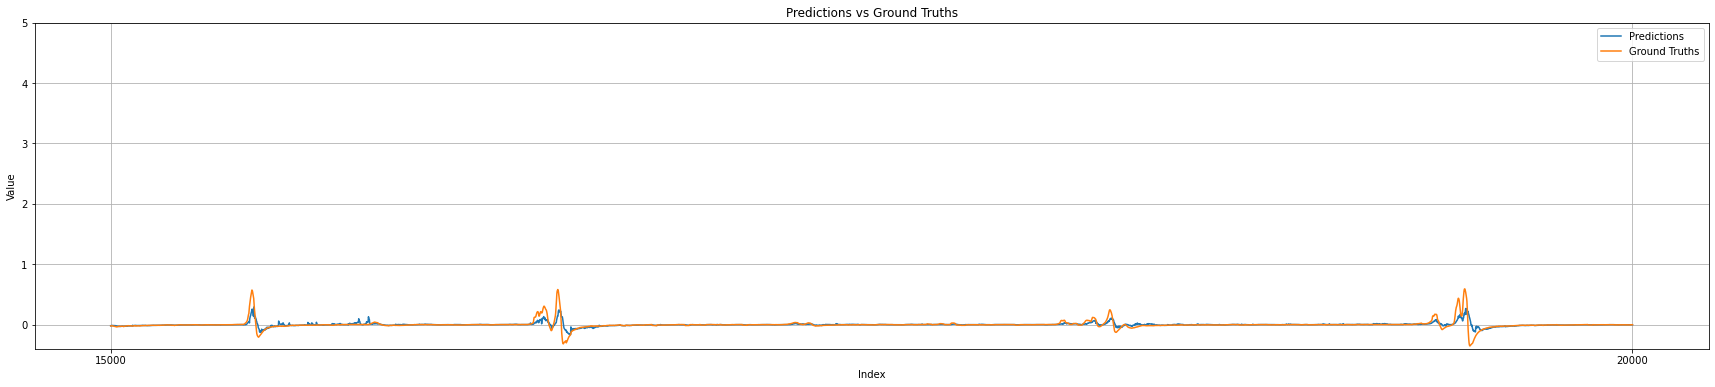

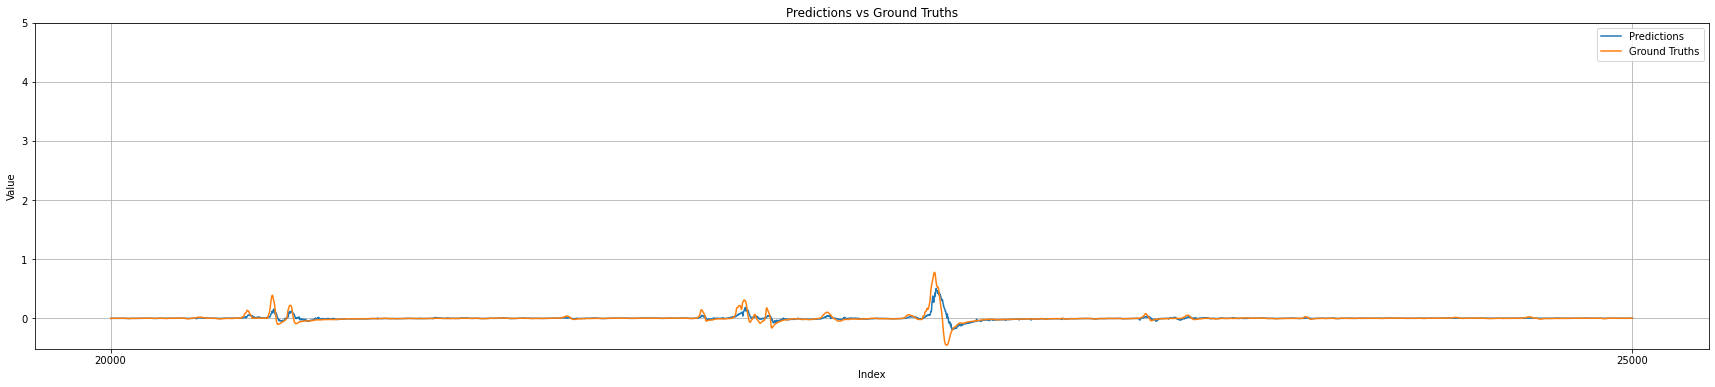

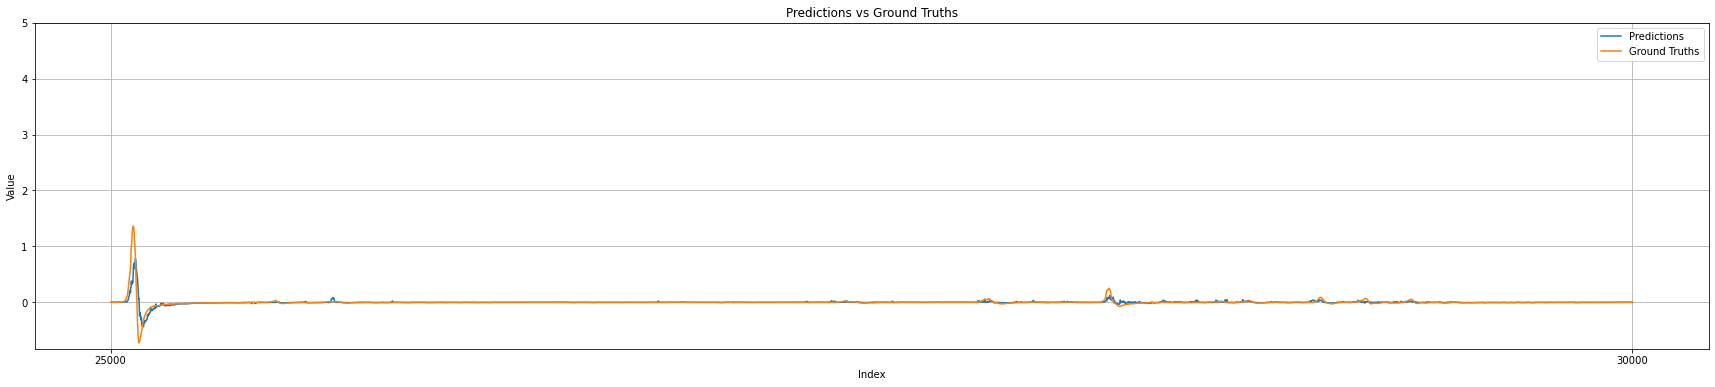

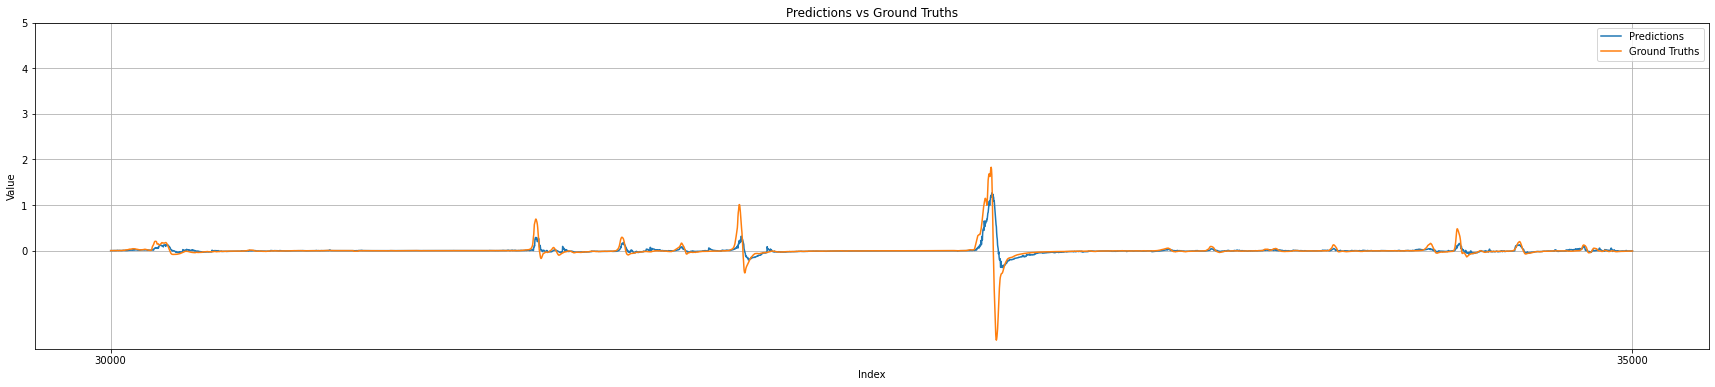

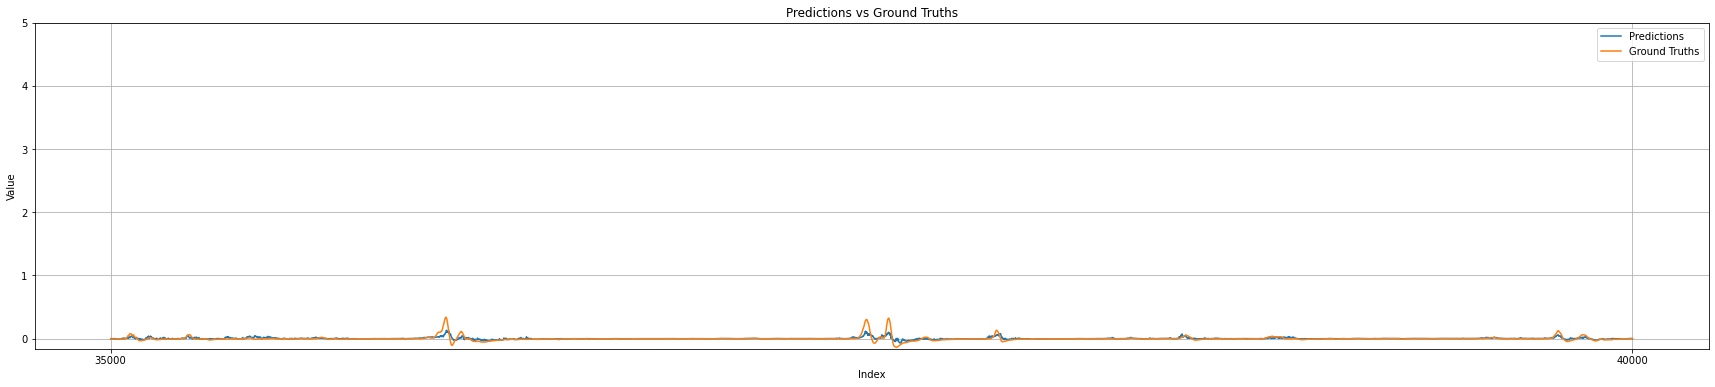

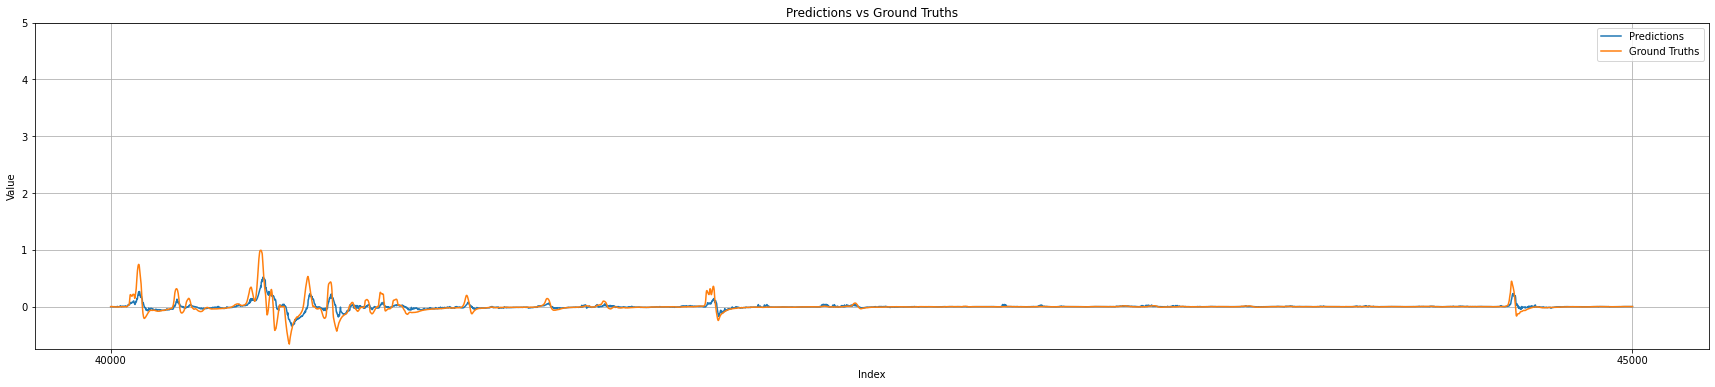

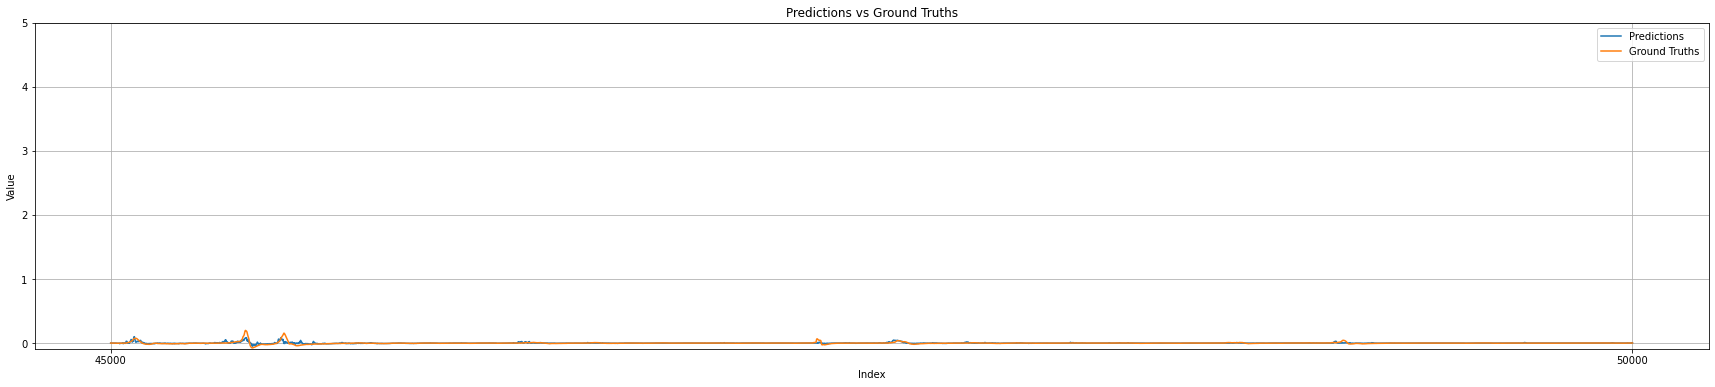

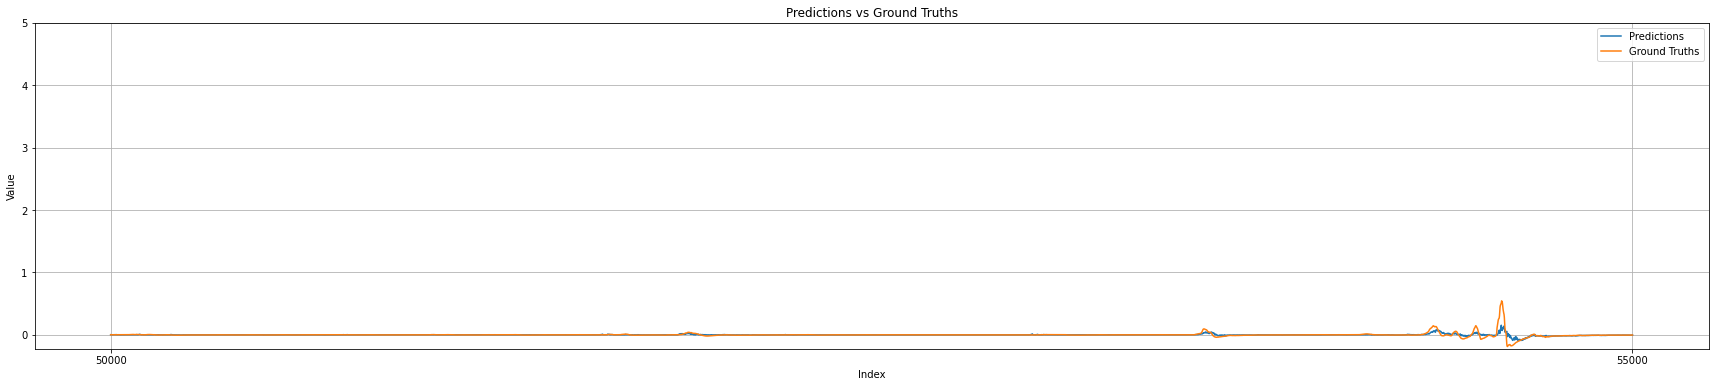

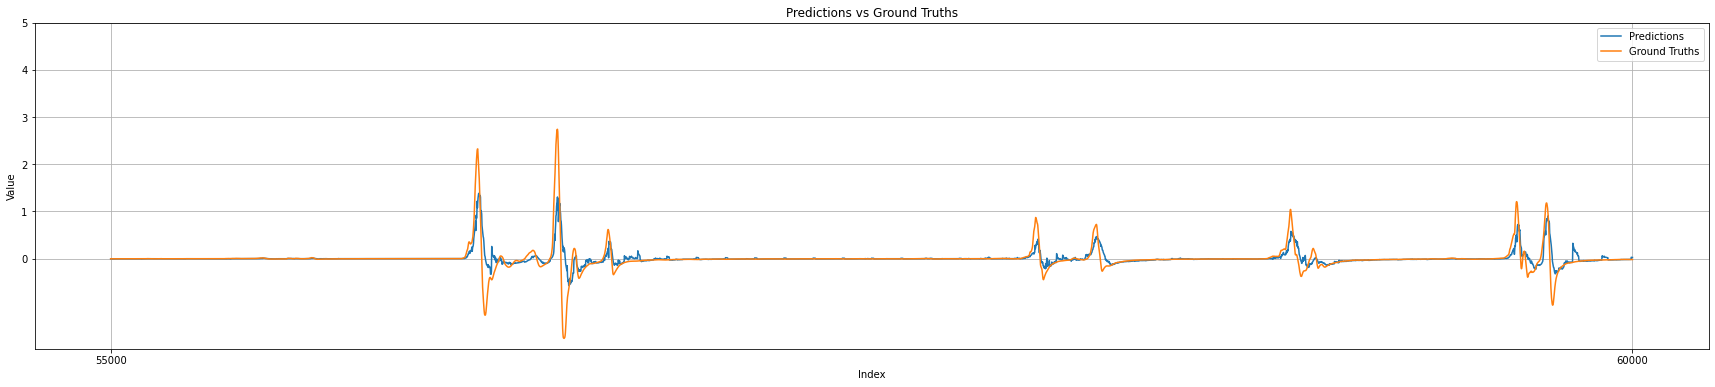

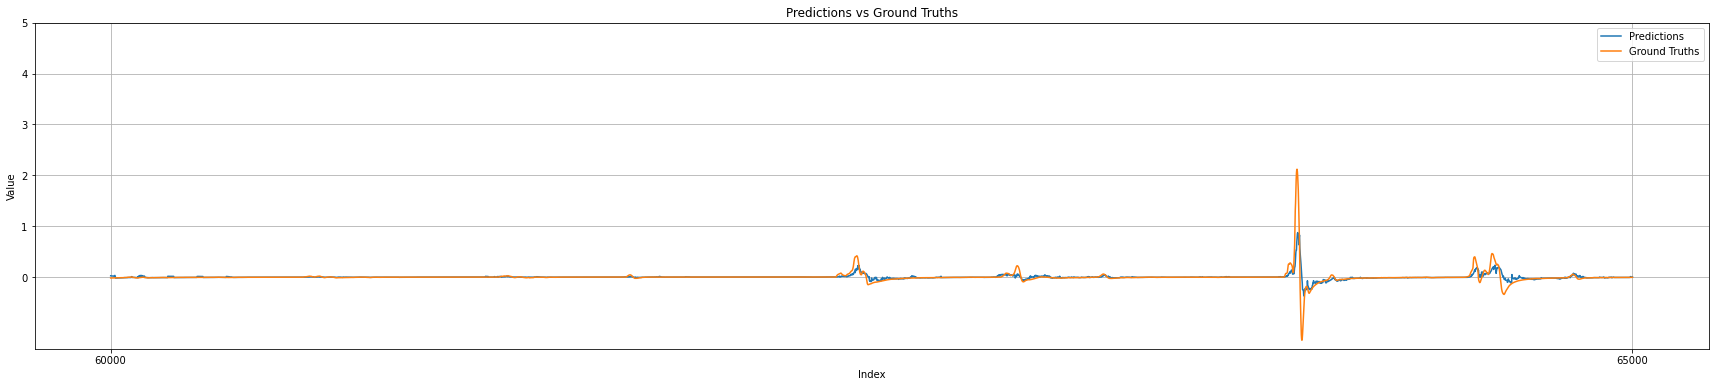

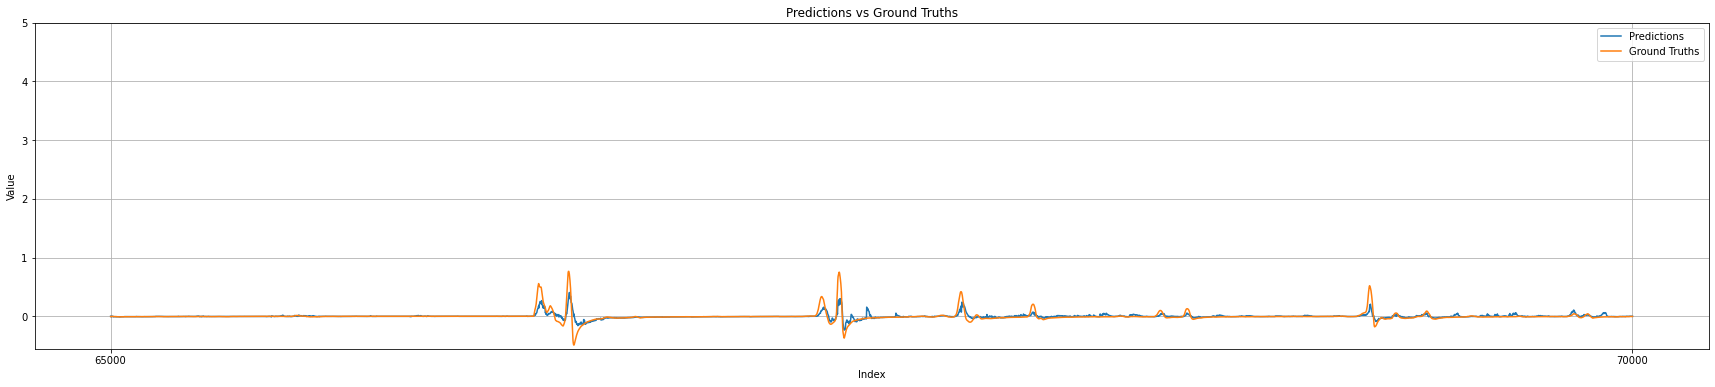

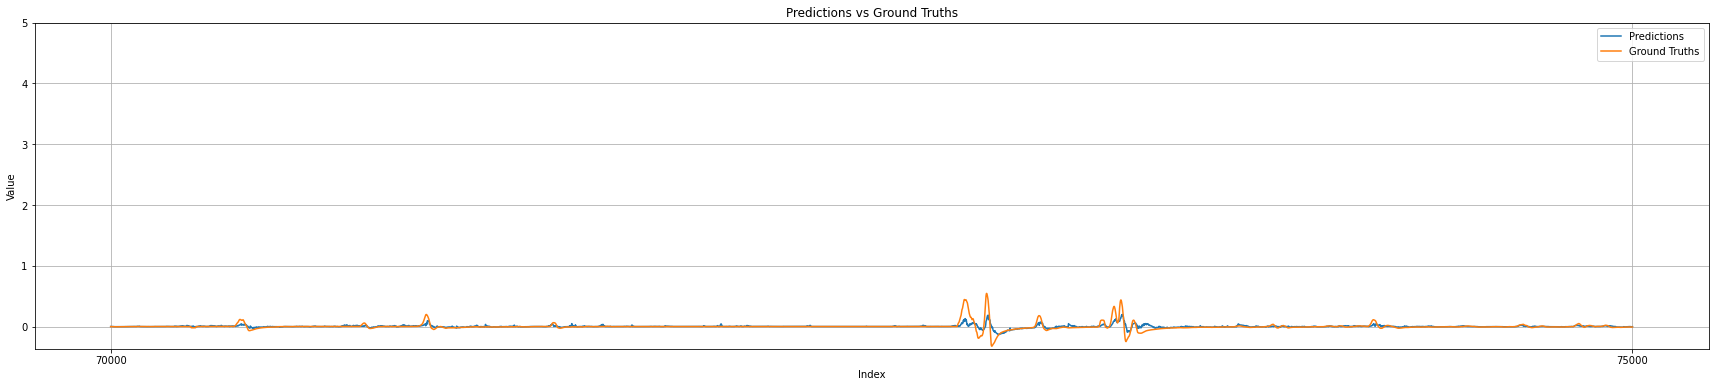

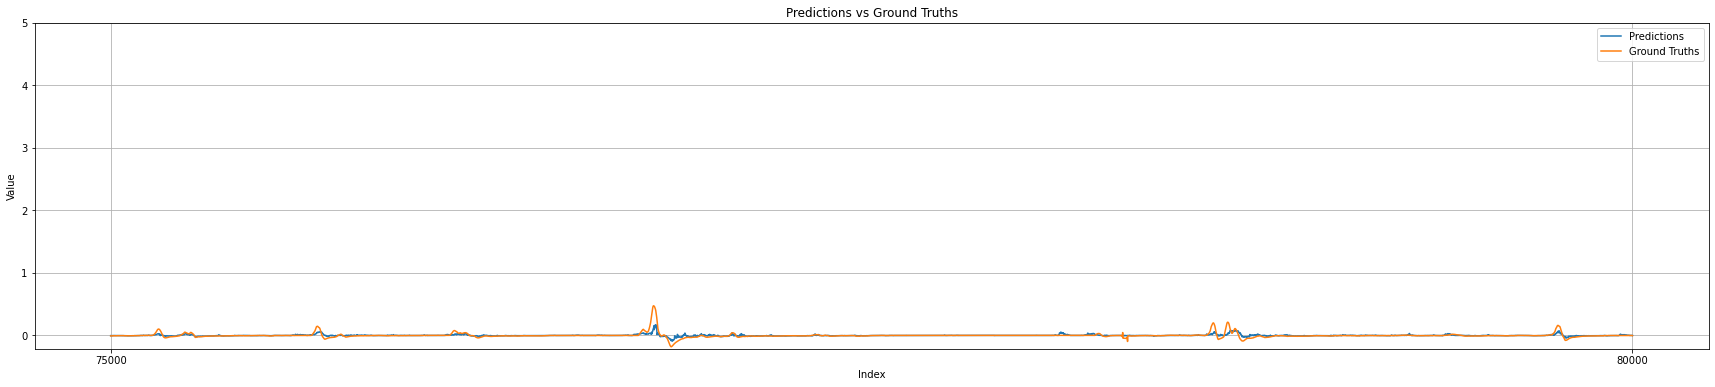

In [3]:
import matplotlib.pyplot as plt
# Plot the data

for i in range(len(predictionsRanged)):
    plt.figure(figsize=(30, 6))
    plt.plot(predictionsRanged[i], label='Predictions')
    plt.plot(ground_truthRanged[i], label='Ground Truths')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Predictions vs Ground Truths')
    plt.xticks([0, interval], [str(i*interval), str((i+1) * interval)])
    plt.yticks([0,1,2,3,4,5])
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
predictions, ground_truths = load_data(file_path,0,86000)

In [5]:
import pandas as pd

# Replace 'example.csv' with the path to your CSV file
csv_file_path = '../../../river_radar/merged_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
print(df.head(10))

                 datetimeUTC     1     2     3     4     5     6     7     8  \
0  2015-07-31 00:00:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
1  2015-07-31 00:15:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
2  2015-07-31 00:30:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
3  2015-07-31 00:45:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
4  2015-07-31 01:00:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
5  2015-07-31 01:15:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
6  2015-07-31 01:30:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
7  2015-07-31 01:45:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
8  2015-07-31 02:00:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
9  2015-07-31 02:15:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   

      9  ...   415   416   417   418   419   420    Tairua  Opitonui  CR Rain  \
0 -20.0  ... -20.0 -20.0 -20.0 -20.0 -

In [6]:
tairua = df['Tairua'].values
predictions+=tairua[:len(predictions)]
ground_truths+=tairua[:len(predictions)]

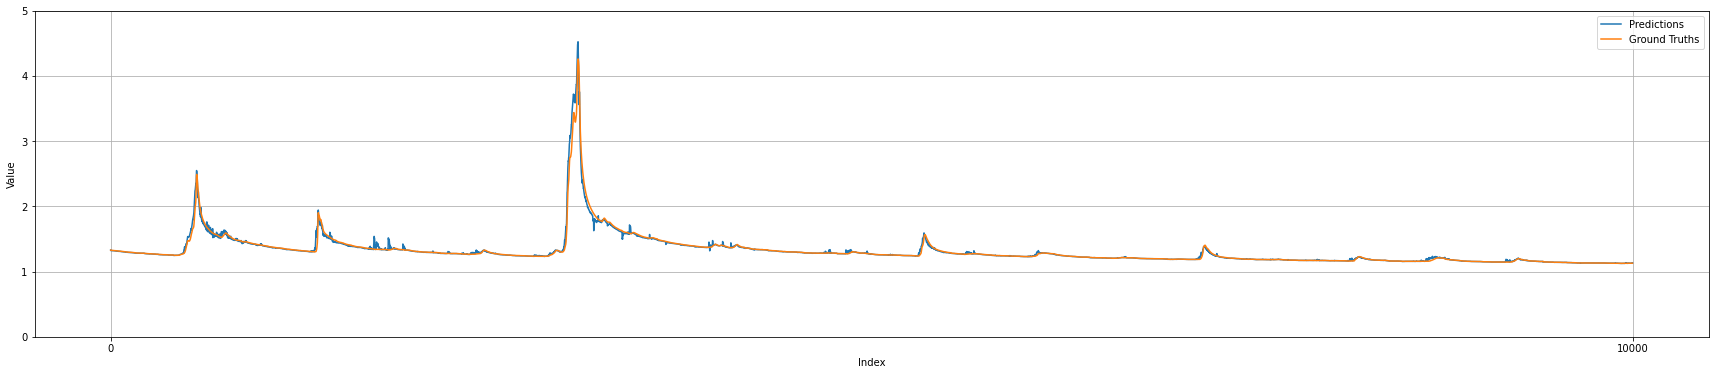

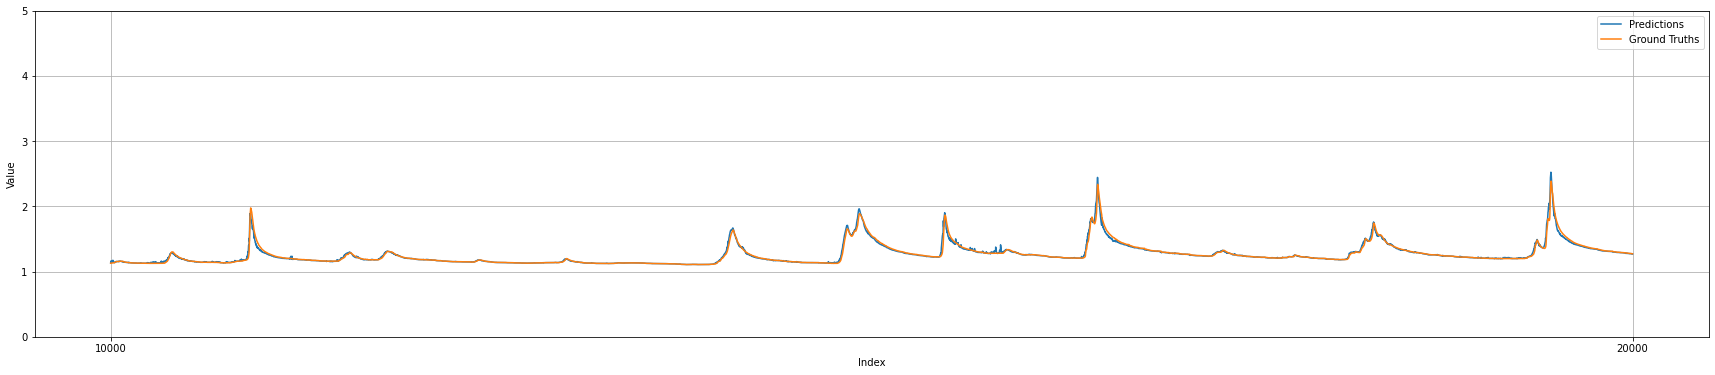

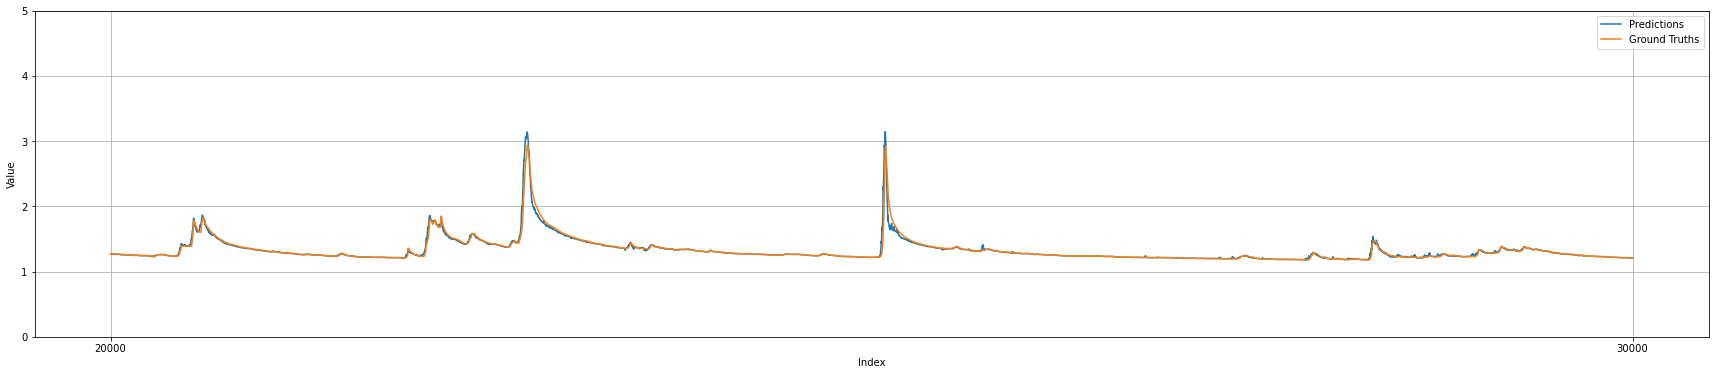

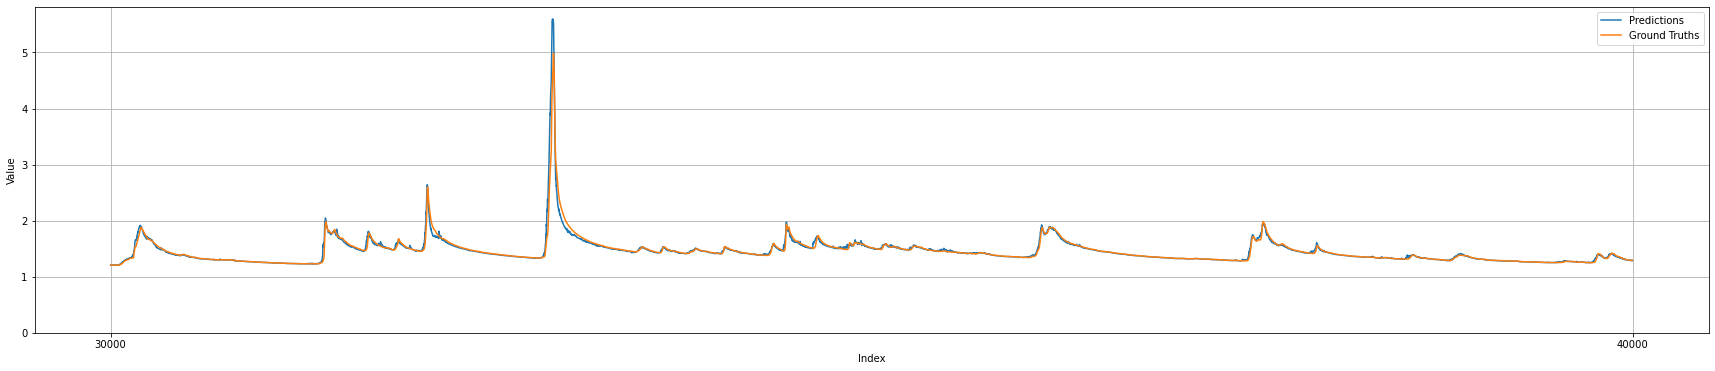

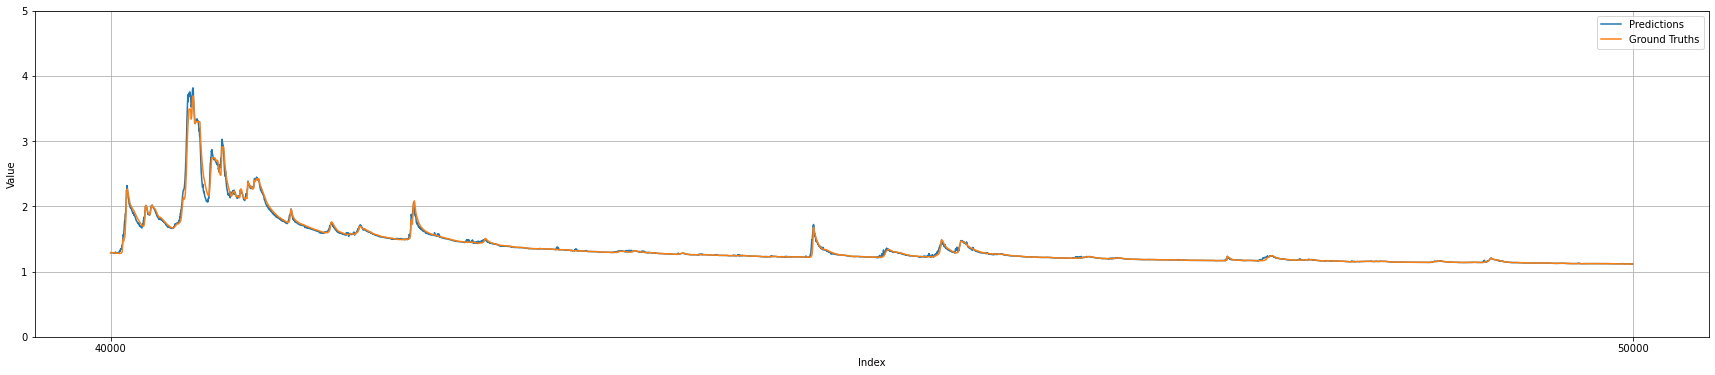

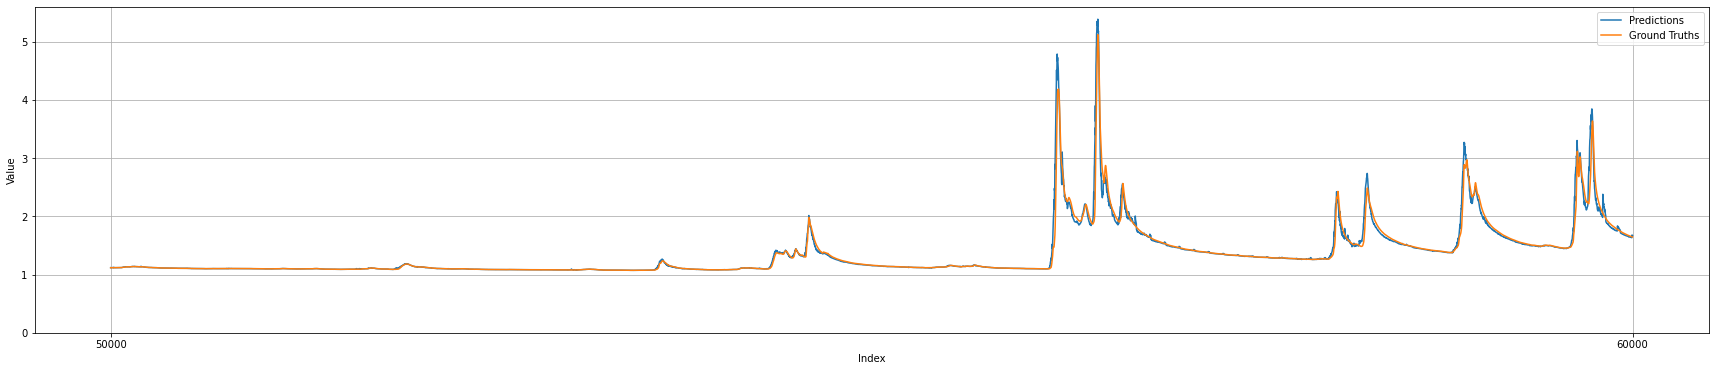

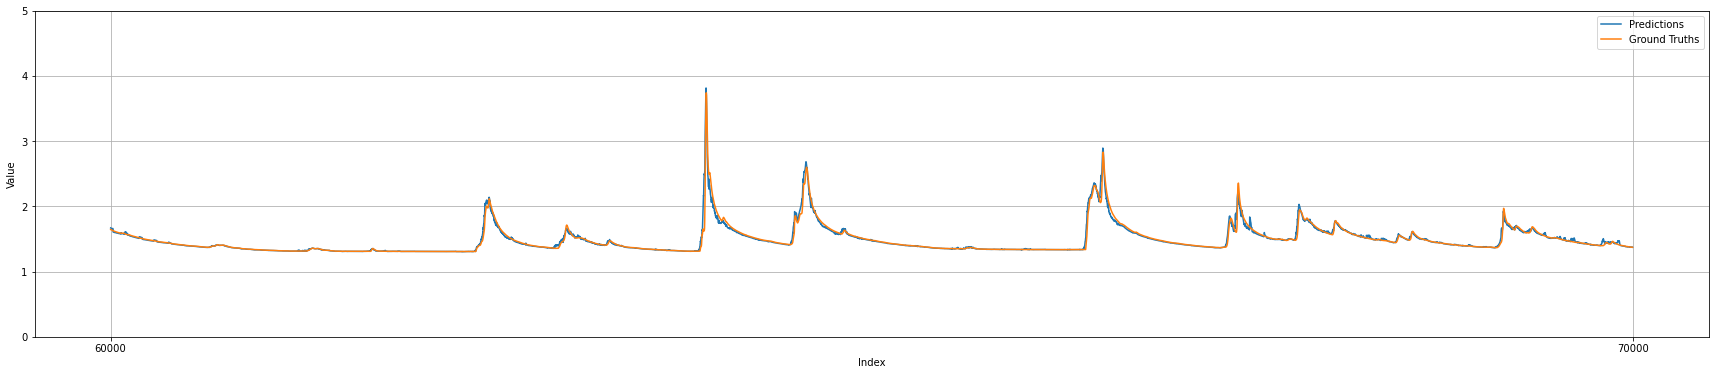

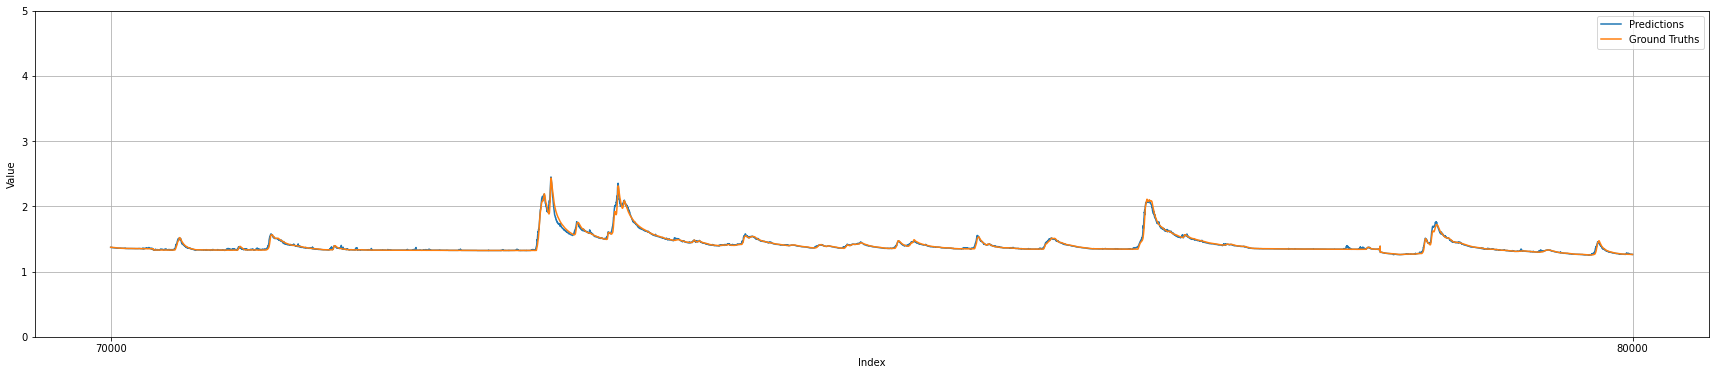

In [7]:
interval = 10000
for i in range(0, min(80000, interval*10), interval):
    plt.figure(figsize=(30, 6))
    plt.plot(predictions[i:i+interval], label='Predictions')
    plt.plot(tairua[i:i+interval], label='Ground Truths')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks([0, interval], [str(i), str(i + interval)])
    plt.yticks([0,1,2,3,4,5])
    plt.show()